In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [84]:

feature = pd.read_csv("data/features.csv")
stores = pd.read_csv("data/stores.csv")
df_test = pd.read_csv("data/test.csv")
df_train = pd.read_csv("data/train.csv")  
submit = pd.read_csv("data/sampleSubmission.csv")

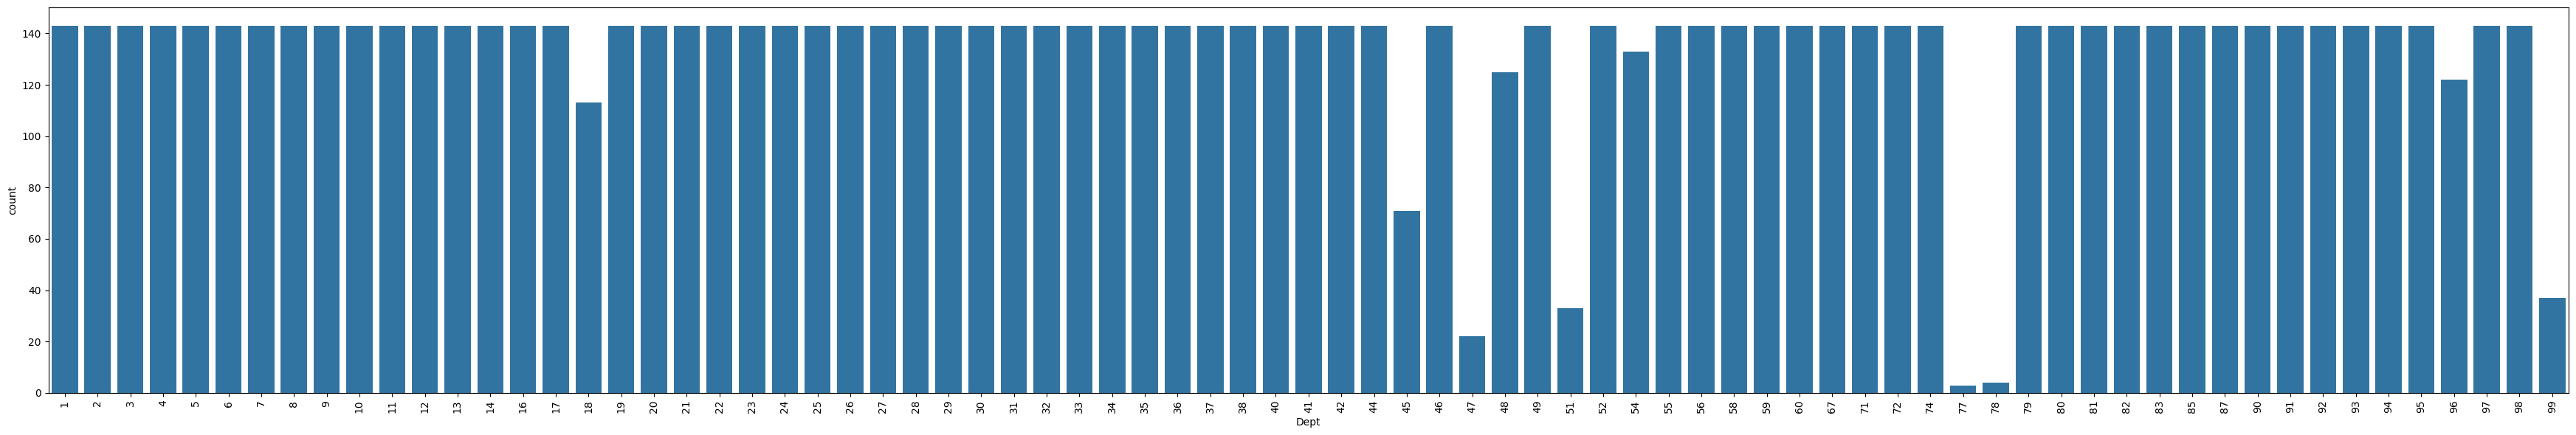

In [85]:
plt.figure(figsize=(35, 6))
sns.countplot(x="Dept", data=df_train[df_train["Store"] == 1])
plt.xticks(rotation=90)
plt.tight_layout()

### Data Availability by Department (Store 1)

**Observation:**
I visualized the number of weekly sales records for each department in Store 1.
- **Consistent Data:** Most departments have around 143 weeks of data, covering the full training period.
- **Sparse Data:** Some departments (e.g., 47, 51, 77) have significantly fewer records.


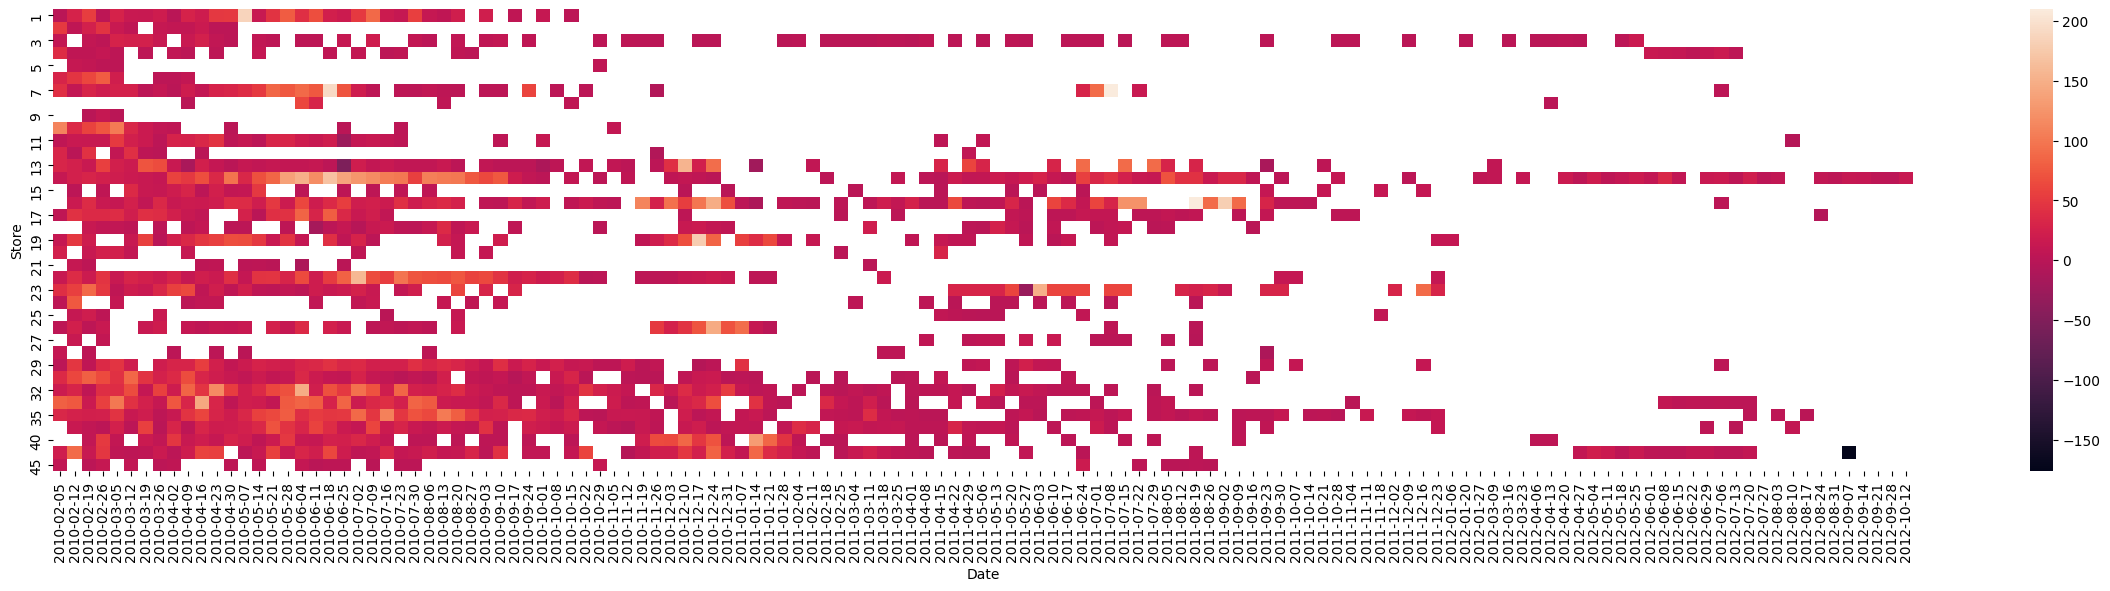

In [86]:
plt.figure(figsize=(30, 6))
sns.heatmap(pd.pivot_table(df_train[df_train["Dept"] == 51], index ="Store", columns = "Date", values = "Weekly_Sales" ))
plt.show()

### Sales Heatmap Analysis (Example: Dept 51)

**Observation:**
I visualized the weekly sales for **Department 51**.
- **Declining Trend:** Sales figures show a downward trend over time.

**Insight:**
- The fading sales activity suggests that **demand for this category might be decreasing**. 

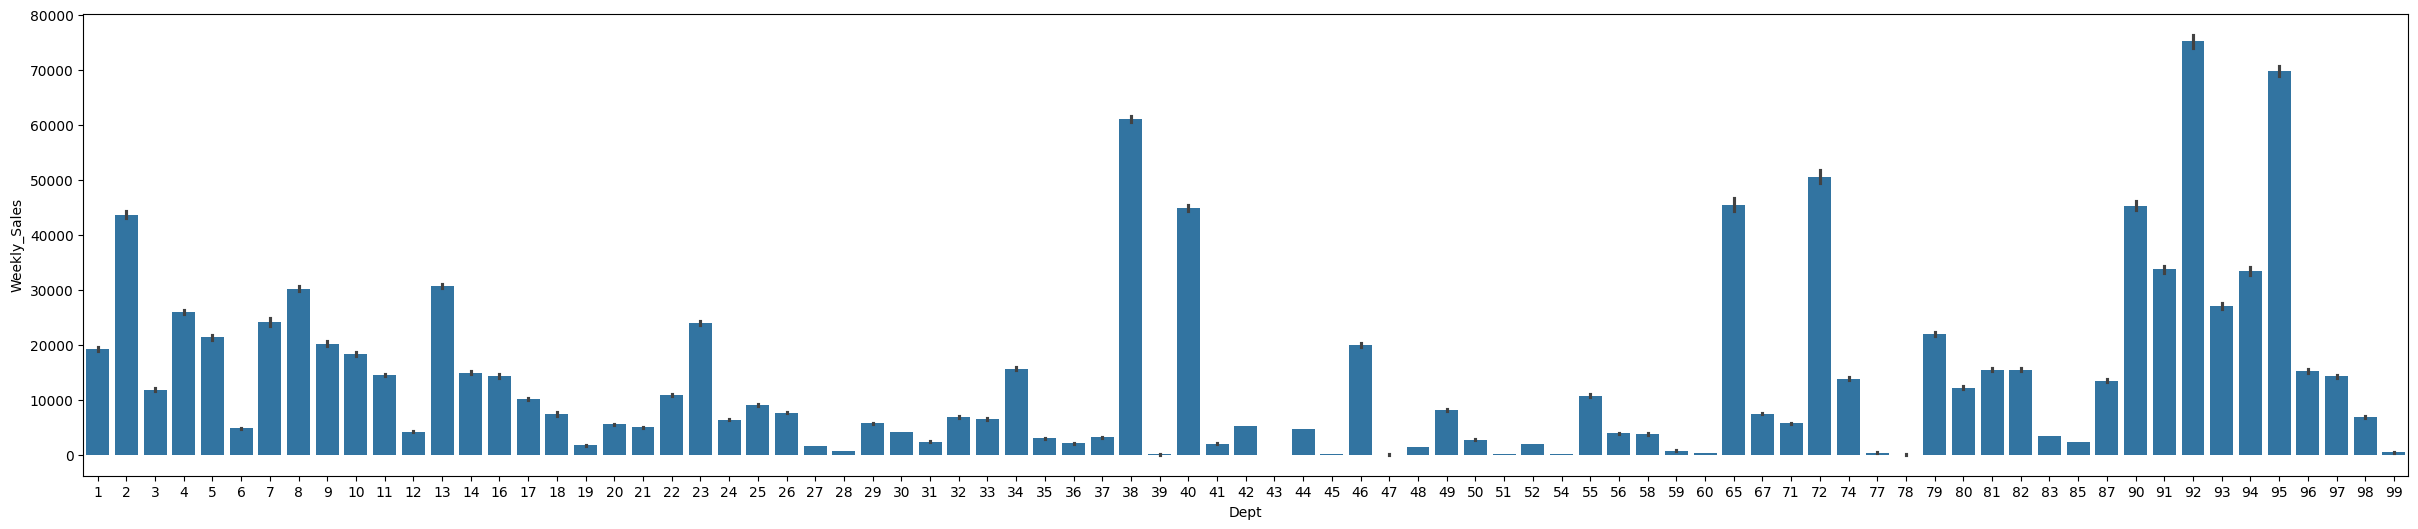

In [87]:
plt.figure(figsize=(30,6))
sns.barplot(x="Dept", y="Weekly_Sales", data=df_train)
plt.show()

### Average Weekly Sales by Department

**Observation:**：I checked which departments make the most money.
- **Huge Gap:** There is a big difference in sales between departments.

**Insight:**
- **Key Takeaway:** Since these few departments drive most of the sales, the model must be accurate for them.

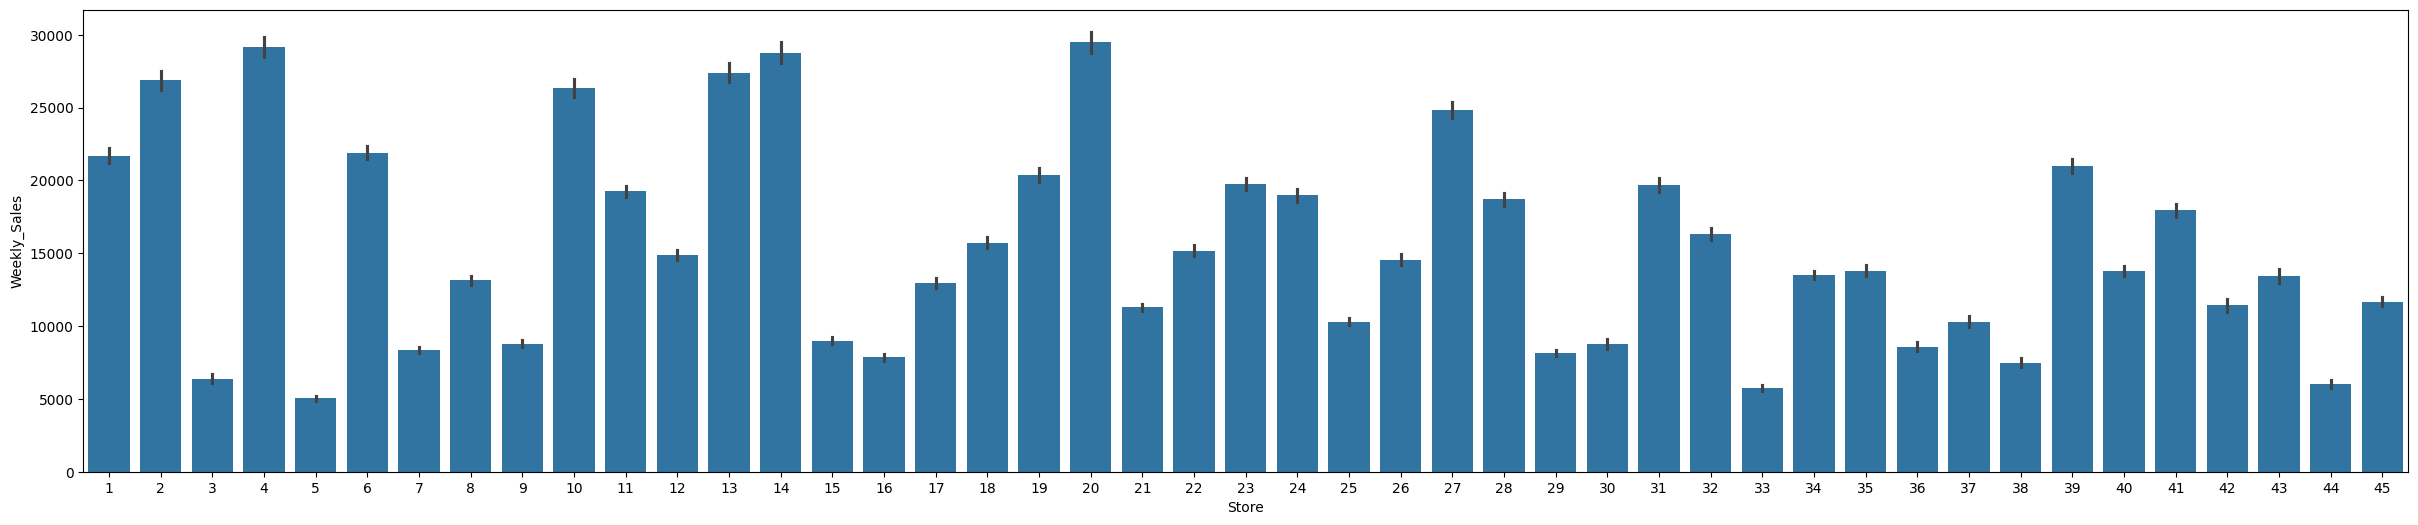

In [88]:
plt.figure(figsize=(30,6))
sns.barplot(x="Store", y="Weekly_Sales", data=df_train)
plt.show()



### Average Sales Analysis by Store

**Observation:**: I visualized the average weekly sales for **all 45 stores**.

* **Significant Variance:** There is a large disparity in sales volume between different stores.


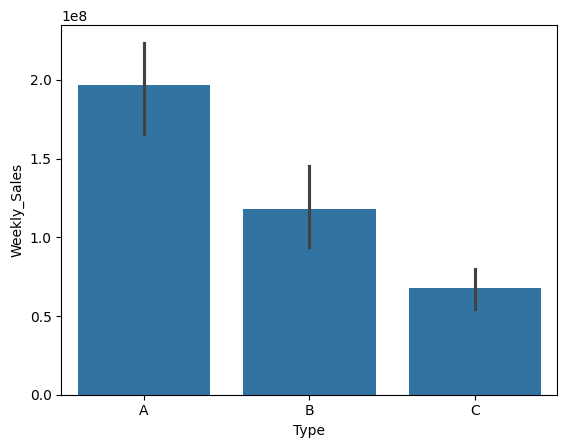

In [89]:
df_temp = pd.merge(df_train.groupby("Store").sum()[["Weekly_Sales"]].reset_index(), stores)
sns.barplot(x ="Type", y="Weekly_Sales", data=df_temp) 
plt.show()

### Total Sales Analysis by Store Type

**Observation:** I visualized the total sales volume for each store type (A, B, C).

* **Clear Hierarchy:** Type A stores generate the highest revenue, followed by Type B, while Type C generates the least.

**Insight:**

* **Predictive Power:** The "Type" category is a very strong indicator of sales potential.
* **Store Size:** This suggests Type A likely represents the largest stores (e.g., Supercenters), while Type C represents smaller locations.

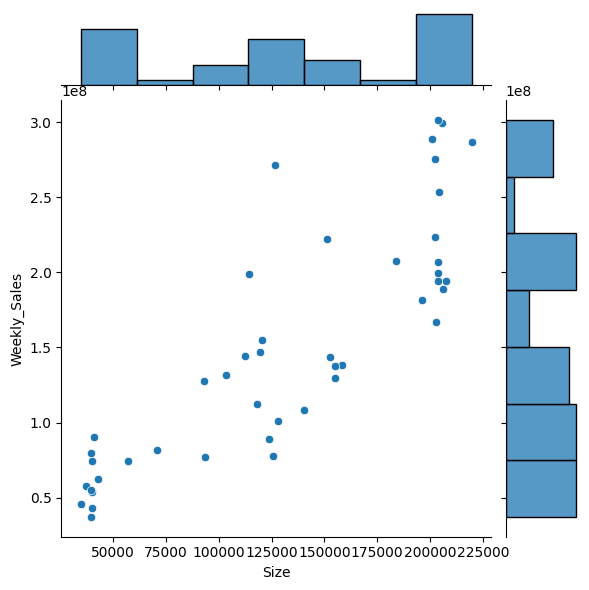

In [90]:
sns.jointplot(x="Size", y="Weekly_Sales", data=df_temp)
plt.show()

### Size vs. Sales Analysis

**Observation:** I checked the relationship between store size and sales.

* **Positive Trend:** Bigger stores clearly have higher sales.

**Insight:**

* **Key Feature:** Store Size is a strong predictor of revenue and is essential for the model.

In [91]:

df_temp.corr(numeric_only=True)

,Store,Weekly_Sales,Size
Store,1.00000,-0.350100,-0.244270
Weekly_Sales,-0.35010,1.000000,0.846161
Size,-0.24427,0.846161,1.000000


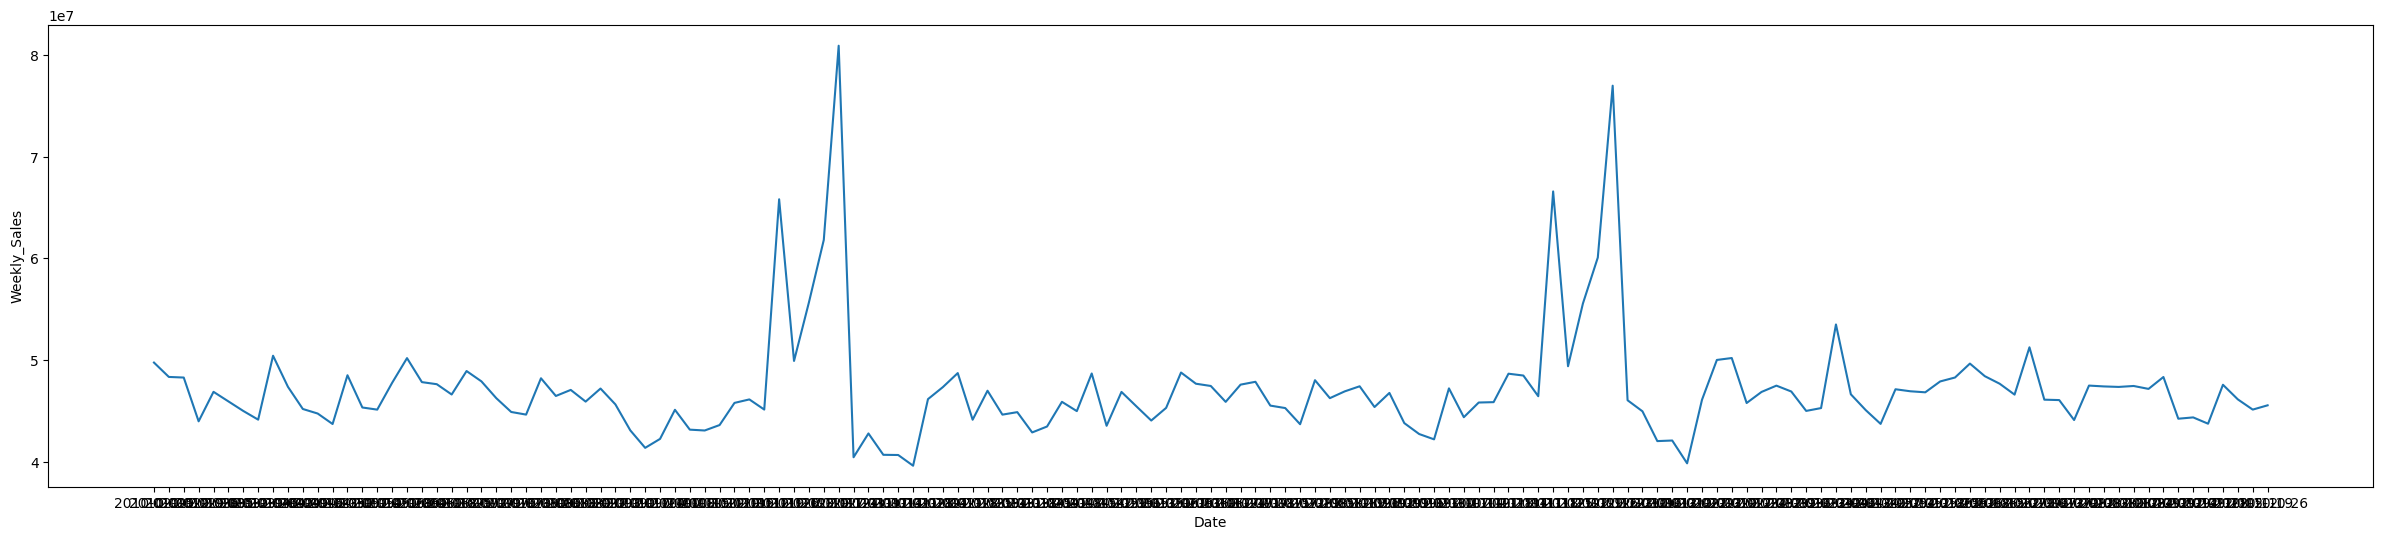

In [92]:
plt.figure(figsize=(30, 6))
df_temp = df_train.groupby("Date").sum().reset_index()
sns.lineplot(x="Date", y="Weekly_Sales", data=df_temp)
plt.show()

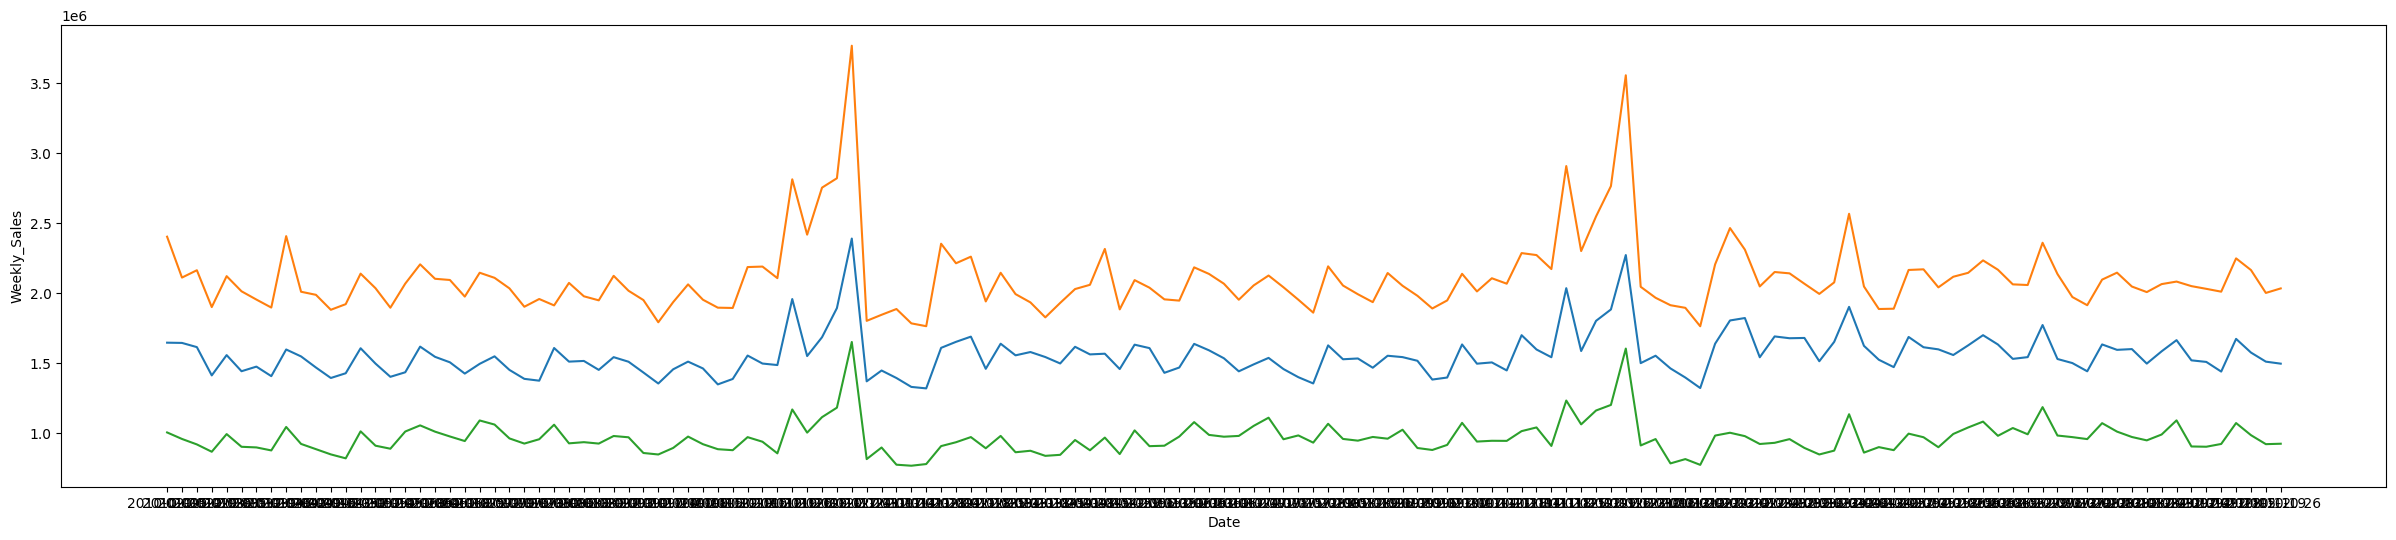

In [94]:
plt.figure(figsize=(30, 6))
df_temp = df_train.groupby(["Date", "Store"]).sum(numeric_only=True).reset_index()
sns.lineplot(x="Date", y="Weekly_Sales", data=df_temp[df_temp["Store"]==1])
sns.lineplot(x="Date", y="Weekly_Sales", data=df_temp[df_temp["Store"]==20])
sns.lineplot(x="Date", y="Weekly_Sales", data=df_temp[df_temp["Store"]==40])
plt.show()

In [95]:
df_tmp = df_train.groupby("Date").sum().reset_index()
df_tmp.sort_values("Weekly_Sales", ascending = False).head(10)

,Date,Store,Dept,Weekly_Sales,IsHoliday
46,2010-12-24,65507,130460,80931415.60,0
98,2011-12-23,67073,135571,76998241.31,0
94,2011-11-25,66864,135801,66593605.26,3021
42,2010-11-26,65217,129373,65821003.24,2938
45,2010-12-17,65676,130438,61820799.85,0
97,2011-12-16,66894,134714,60085695.94,0
44,2010-12-10,65354,129960,55666770.39,0
96,2011-12-09,66809,134656,55561147.70,0
113,2012-04-06,66323,132587,53502315.87,0
126,2012-07-06,65939,132367,51253021.88,0
